In [468]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [469]:
trainDF = pd.read_csv(r'D:\Kaggle\data\train.csv')

testData = pd.read_csv(r'D:\Kaggle\data\test_extracted.csv')
actual_labels = testData['user']
testDF = testData.drop(columns=['user'])

# testDF = pd.read_csv(r'D:\Kaggle\data\test.csv')

ParserError: Error tokenizing data. C error: Expected 27 fields in line 134, saw 56


In [ ]:
# trainDF.head()

In [ ]:
testDF

press-0      release-0        press-1      release-1        press-2  \
0  1717927480098  1717927480182  1717927480315  1717927480438  1717927480575   
1  1717947715091  1717947715231  1717947715351  1717947715476  1717947715498   
2  1717948125631  1717948125714  1717948125932  1717948126035  1717948126284   
3  1717993482176  1717993482370  1717993482383  1717993482561  1717993482587   
4  1717993511703  1717993511820  1717993512039  1717993512119  1717993512336   
5  1717993541453  1717993541538  1717993542188  1717993542272  1717993542461   

       release-2        press-3      release-3        press-4      release-4  \
0  1717927480710  1717927480748  1717927480875  1717927480987  1717927481122   
1  1717947715666  1717947715777  1717947715934  1717947716105  1717947716241   
2  1717948126393  1717948126913  1717948127016  1717948127190  1717948127288   
3  1717993482719  1717993482768  1717993482874  1717993483523  1717993483597   
4  1717993512456  1717993512845  1717993512937  1717993513019  1717993513099   
5  1717993542572  1717993542800  1717993542894  1717993543044  1717993543119   

   ...        press-8      release-8        press-9      release-9  \
0  ...  1717927482170  1717927482284  1717927482561  1717927482742   
1  ...  1717947717736  1717947717903  1717947718053  1717947718178   
2  ...  1717948128448  1717948128571  1717948130669  1717948130779   
3  ...  1717993484731  1717993484847  1717993484900  1717993484981   
4  ...  1717993514420  1717993514502  1717993514637  1717993514761   
5  ...  1717993544339  1717993544426  1717993544561  1717993544733   

        press-10     release-10       press-11     release-11       press-12  \
0  1717927482828  1717927482934  1717927483059  1717927483212  1717927483355   
1  1717947718552  1717947718683  1717947718898  1717947719039  1717947719388   
2  1717948131333  1717948131404  1717948131952  1717948132038  1717948132463   
3  1717993485039  1717993485142  1717993485581  1717993485658  1717993485878   
4  1717993514945  1717993515031  1717993515403  1717993515496  1717993515663   
5  1717993544774  1717993544865  1717993545082  1717993545162  1717993545298   

      release-12  
0  1717927483474  
1  1717947719517  
2  1717948132547  
3  1717993485945  
4  1717993515767  
5  1717993545381  

[6 rows x 26 columns]

In [ ]:
print('No. of rows in training dataset:',len(trainDF))
print('No. of users for which training data is present:',trainDF.user.nunique( ))

No. of rows in training dataset: 930
No. of users for which training data is present: 116


In [ ]:
print('No. of rows in test dataset:',len(testDF))

No. of rows in test dataset: 6


In [ ]:
trainDF1 = trainDF
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
    
testDF1 = testDF
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

In [ ]:
trainDF1.head()

user  press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0     1        0        120      216        312      424        496      592   
1     1        0         95      168        265      360        455      527   
2     1        0         71      143        231      783        903     1087   
3     1        0         95      144        263      353        431      760   
4     1        0         70      166        238      310        406      526   

   release-3  press-4  ...  HD-3  HD-4  HD-5  HD-6  HD-7  HD-8  HD-9  HD-10  \
0        664      808  ...    72    48    72    96    48    48    72     72   
1        599      736  ...    72    71    71    71    56    48    47     72   
2       1159     1351  ...    72   103    72    96    79    72    72     72   
3        832     1159  ...    72    48    50    91    47    72    48     72   
4        598      710  ...    72    48    72    96    72    72    62     72   

   HD-11  HD-12  
0     48     72  
1     72     48  
2     72     55  
3     72     72  
4     72     96  

[5 rows x 64 columns]

In [ ]:
trainDF1.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

## TrainDF2

In [ ]:
# Check stats of first 5 users i.e. 5 x 8 typing patterns
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]

In [ ]:
len(trainDF2)
# trainDF2

40

In [ ]:
temp1 = pd.DataFrame({'Min':trainDF2.min(),'Max':trainDF2.max()})
temp1.head()


Min  Max
user         1    5
press-0      0    0
release-0    0  120
press-1      0  253
release-1   78  360

Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

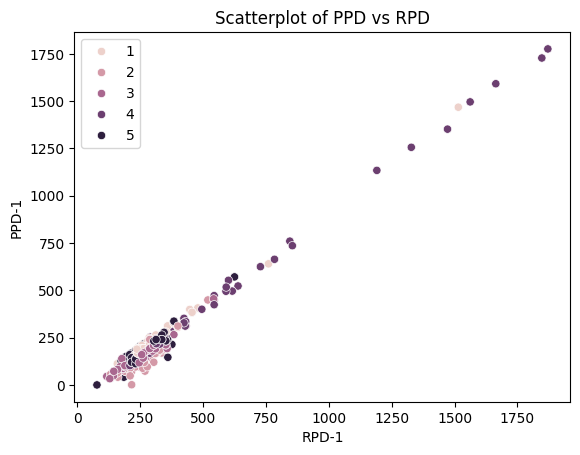

In [ ]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)

# Small trick to avoid repeating legends: https://stackoverflow.com/a/36268401/5370202    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')

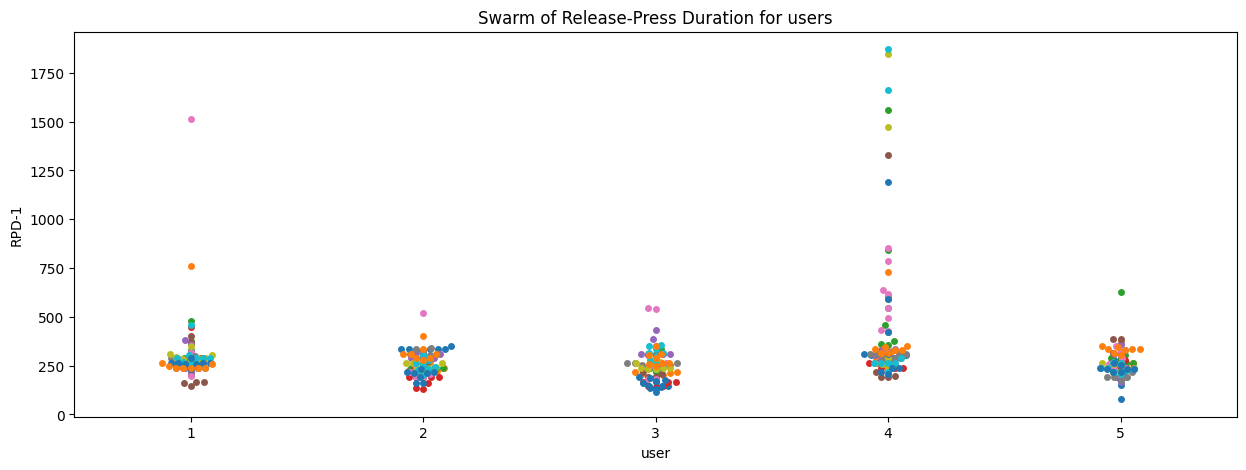

In [ ]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

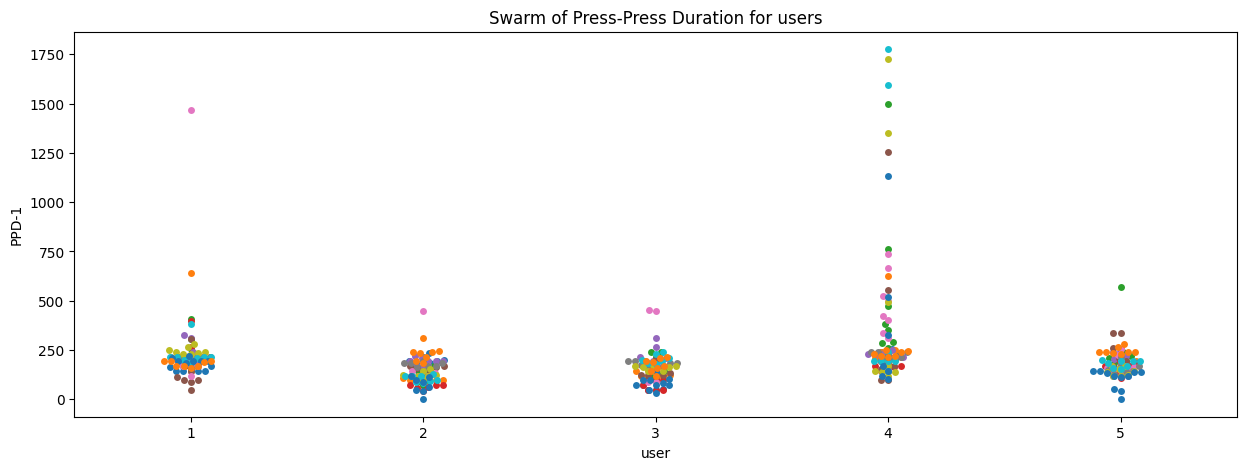

In [ ]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Press-Press Duration for users')

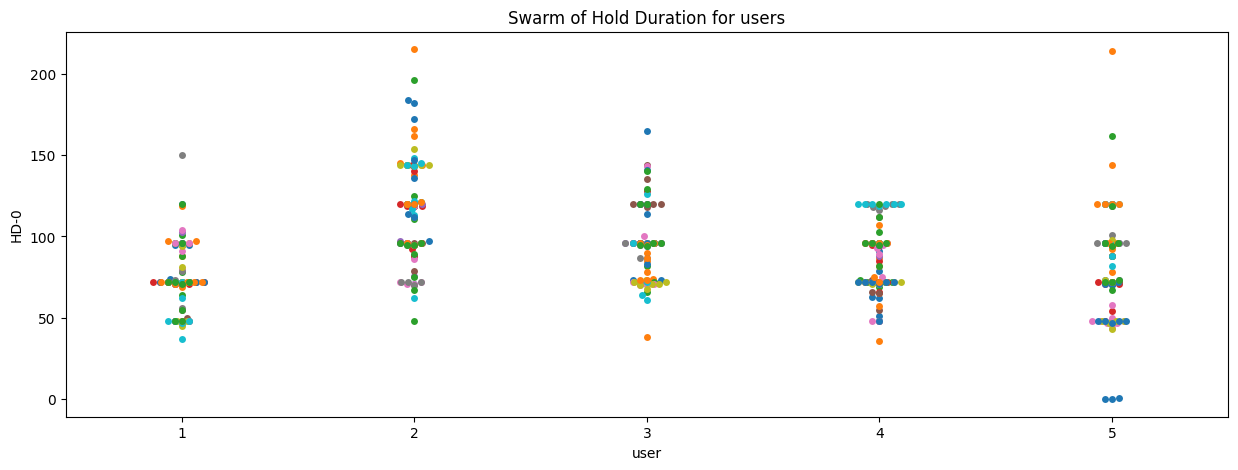

In [ ]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Hold Duration for users')

In [ ]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_HD_analysis

In [ ]:
trainDF_HD_analysis

user  press-  HD-
id key_no                   
0  0          1       0  120
   1          1     216   96
   2          1     424   72
   3          1     592   72
   4          1     808   48
...         ...     ...  ...
39 8          5    1267   43
   9          5    1420   82
   10         5    1574   72
   11         5    1710   96
   12         5    1950   73

[520 rows x 3 columns]

In [ ]:
# print(testDF_UserProps.columns)


<Axes: xlabel='press-', ylabel='HD-'>

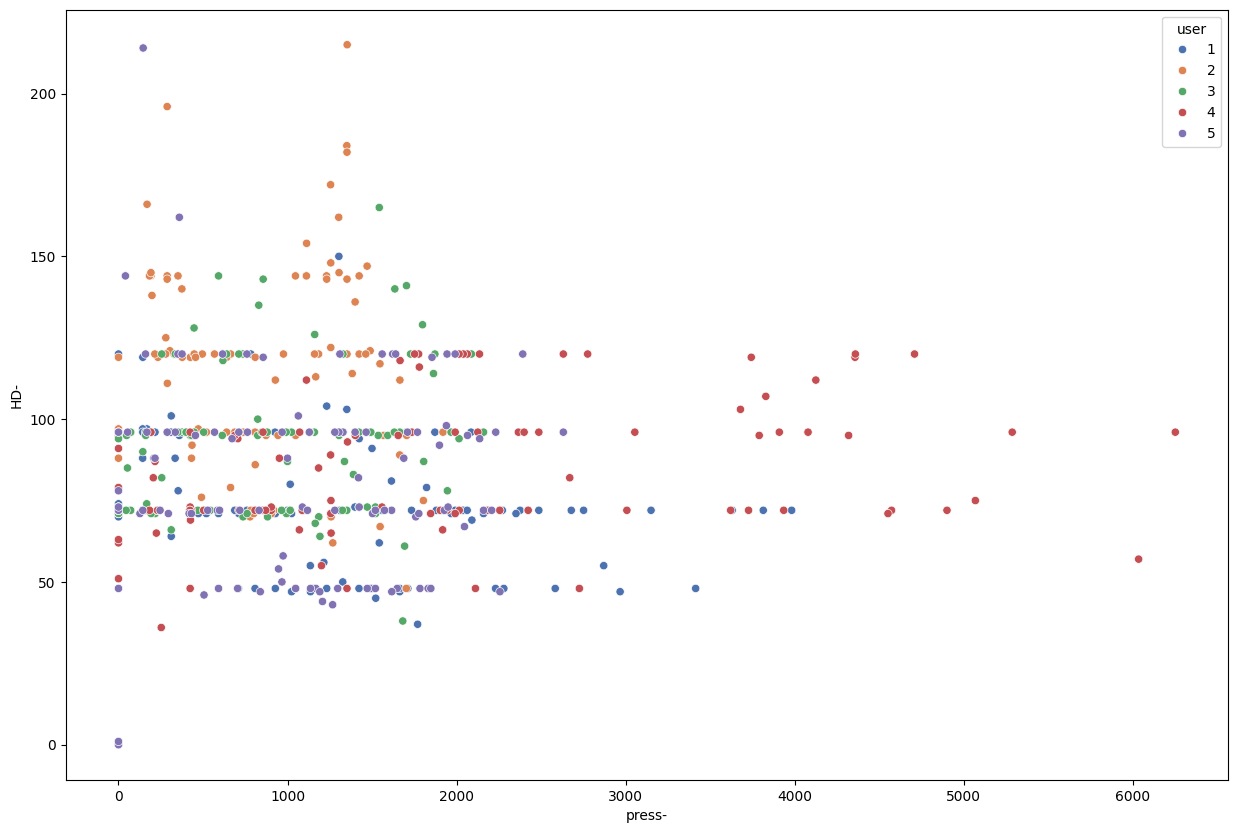

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

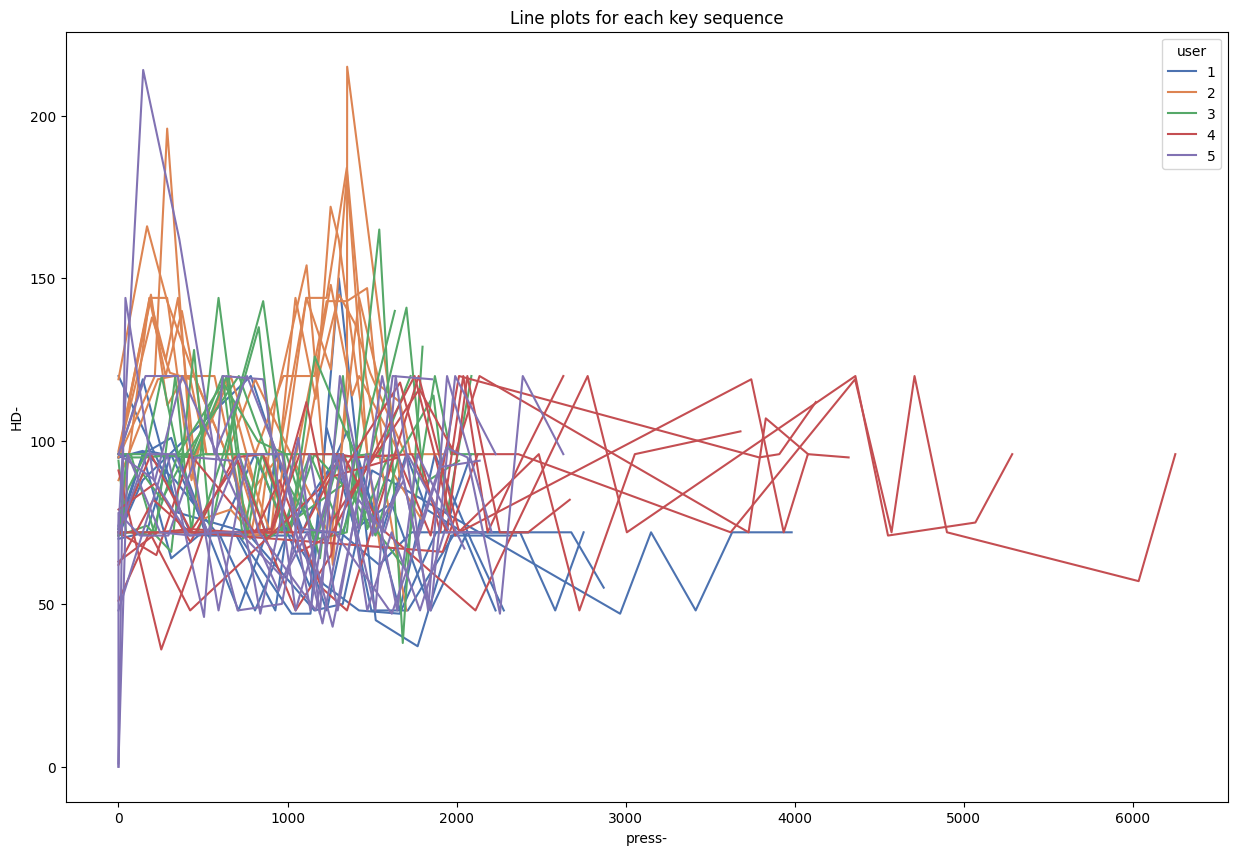

In [ ]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [ ]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF2.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_PPD_analysis

<Axes: xlabel='press-', ylabel='PPD-'>

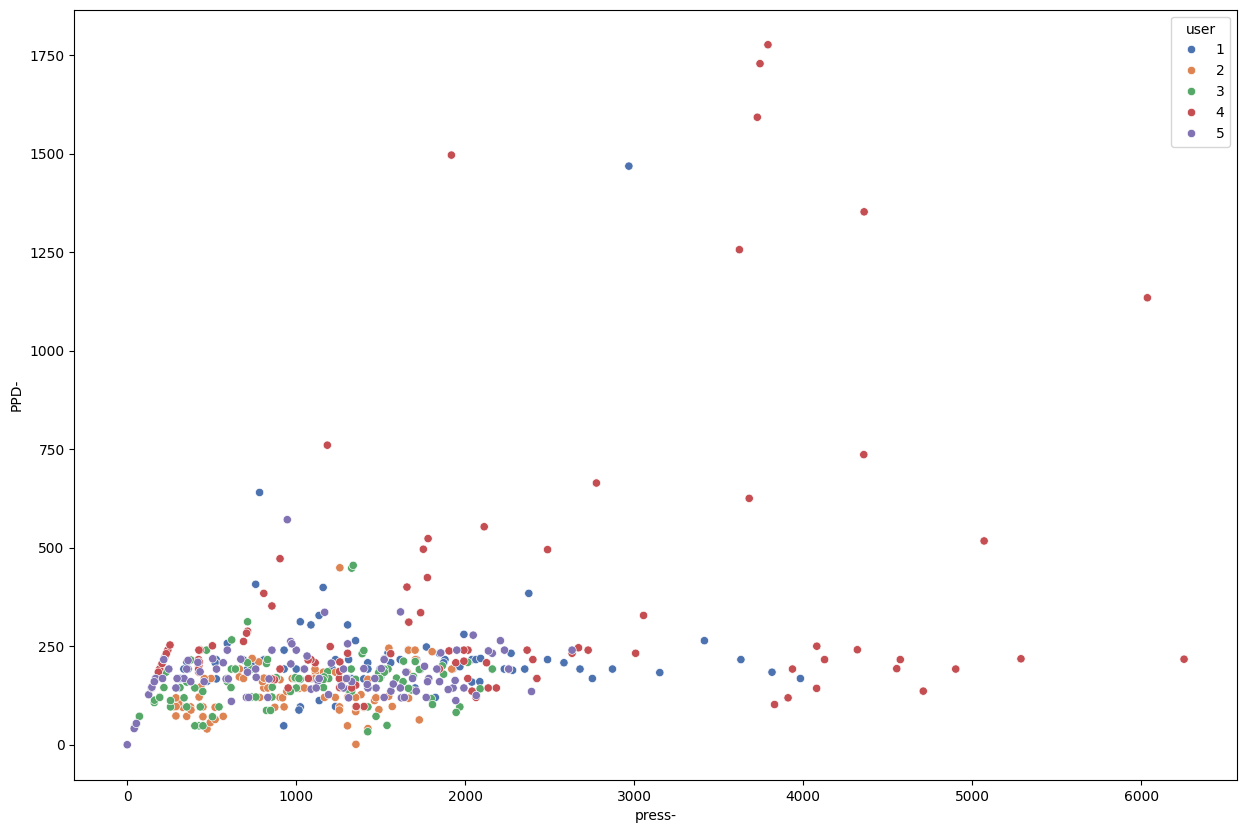

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

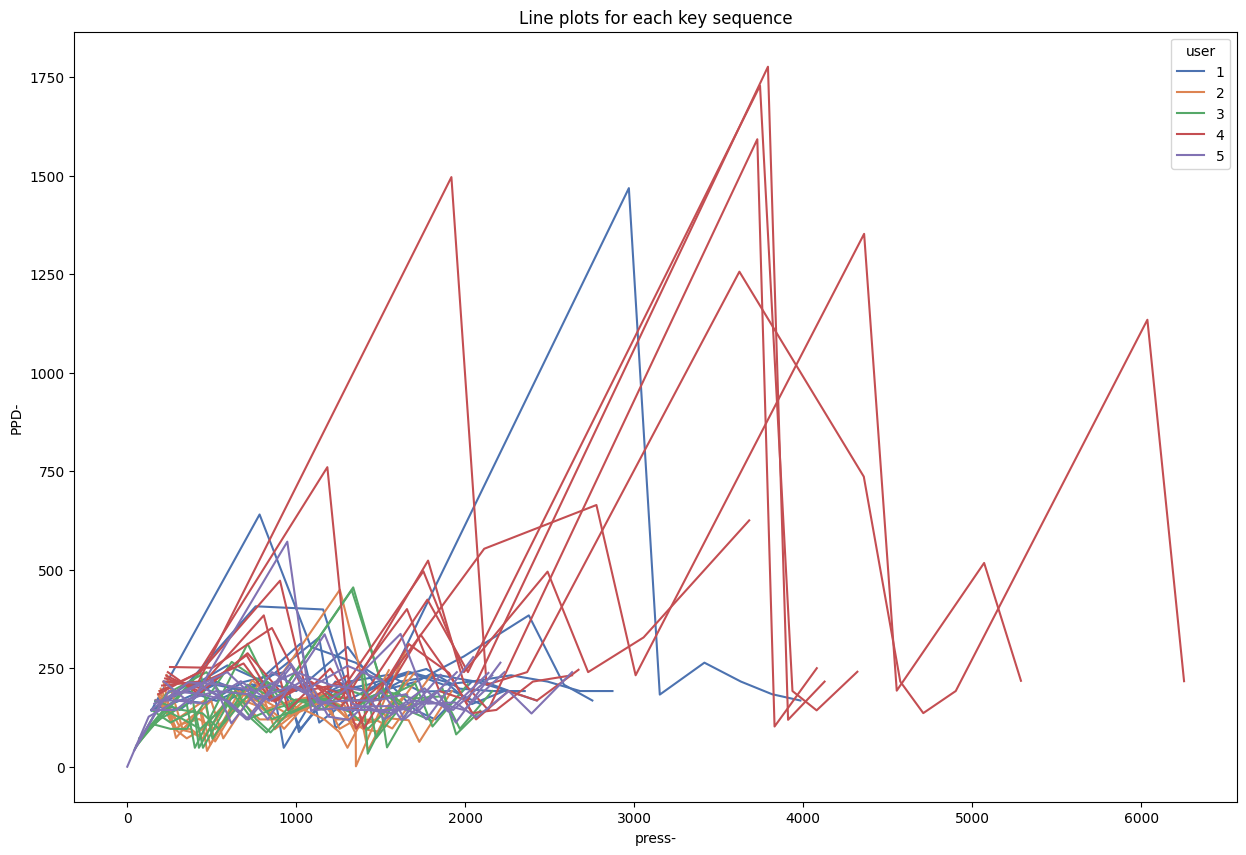

In [ ]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [ ]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF2.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_RPD_analysis

<Axes: xlabel='press-', ylabel='RPD-'>

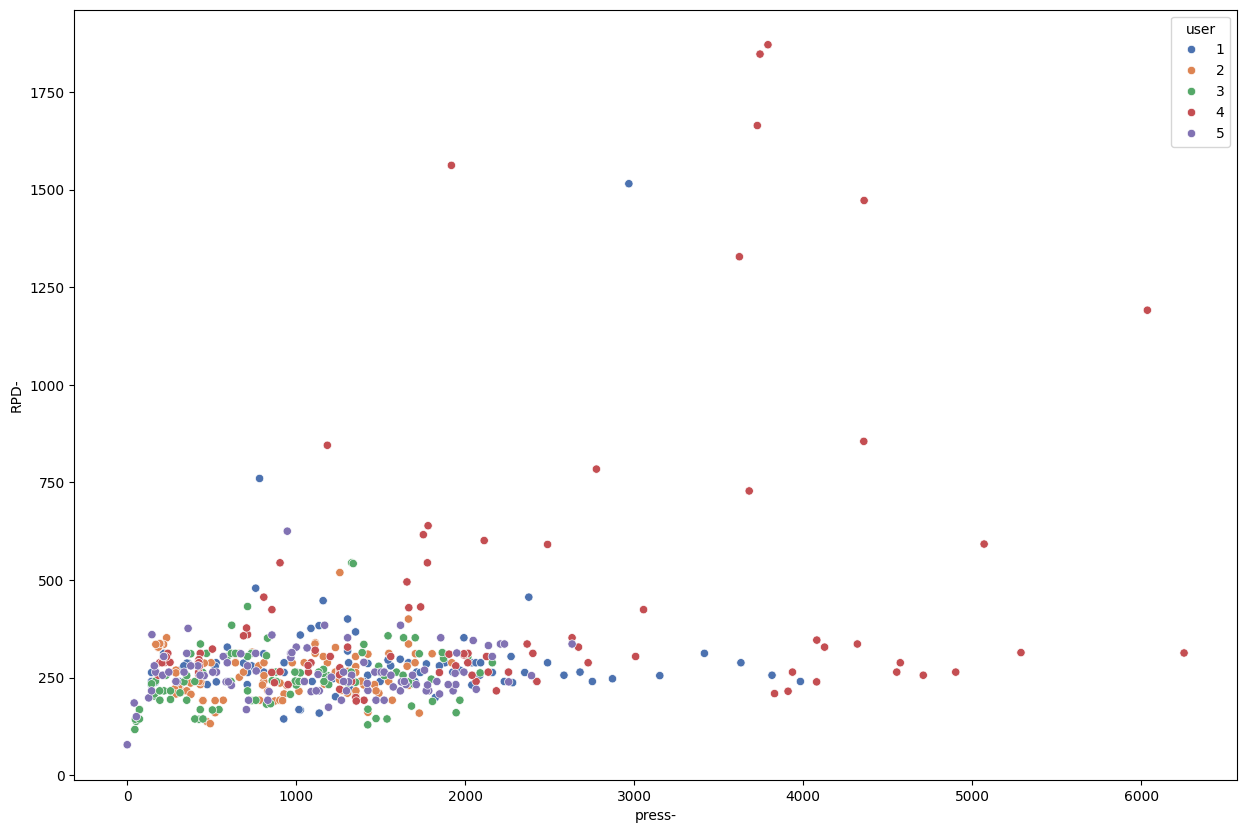

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

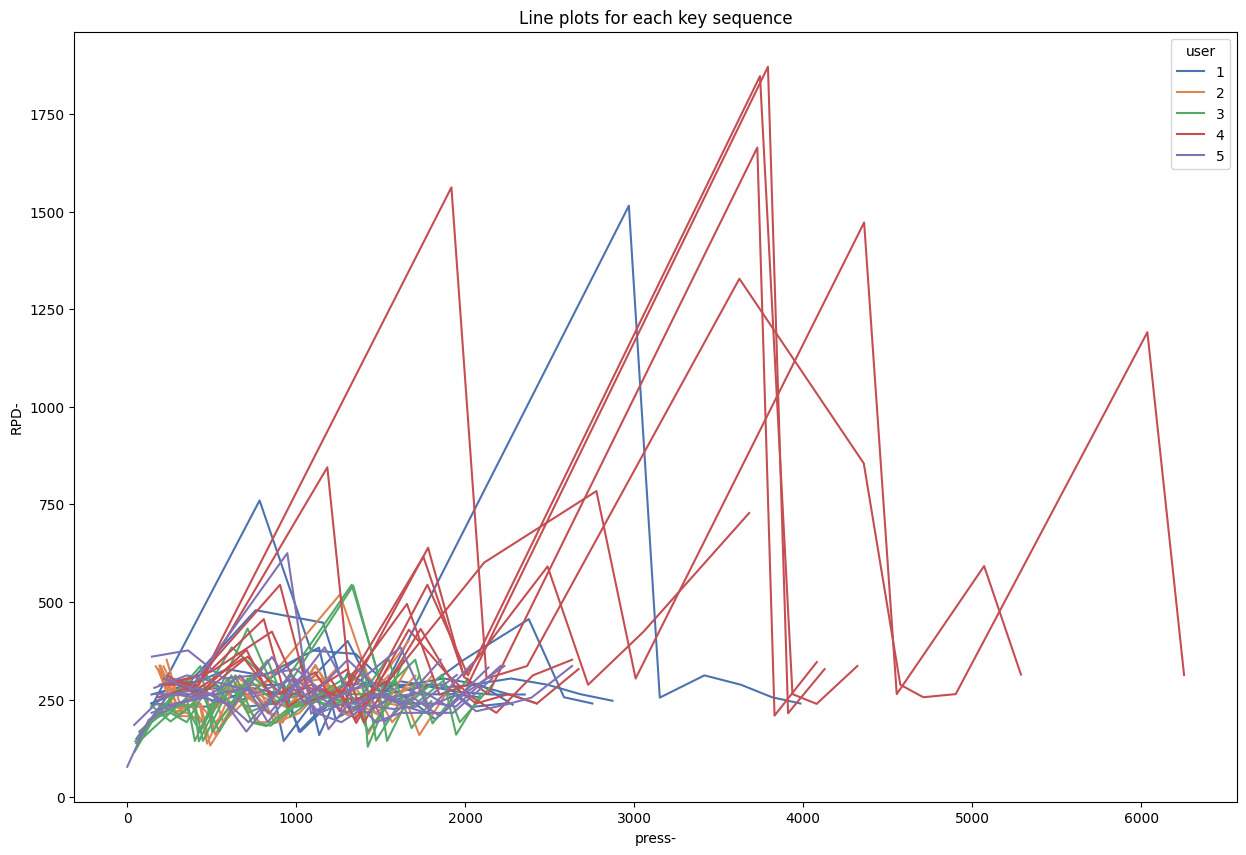

In [ ]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [ ]:
## Training Data

# use HD
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF1.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

# use ppd
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF1.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

# use rpd
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF1.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_PPD_analysis = testDF1.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

In [ ]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')


In [ ]:
trainDFCombined.columns

Index(['user', 'press-', 'HD-', 'RPD-', 'PPD-'], dtype='object')

In [ ]:
testDFCombined.columns

Index(['press-', 'HD-', 'RPD-', 'PPD-'], dtype='object')

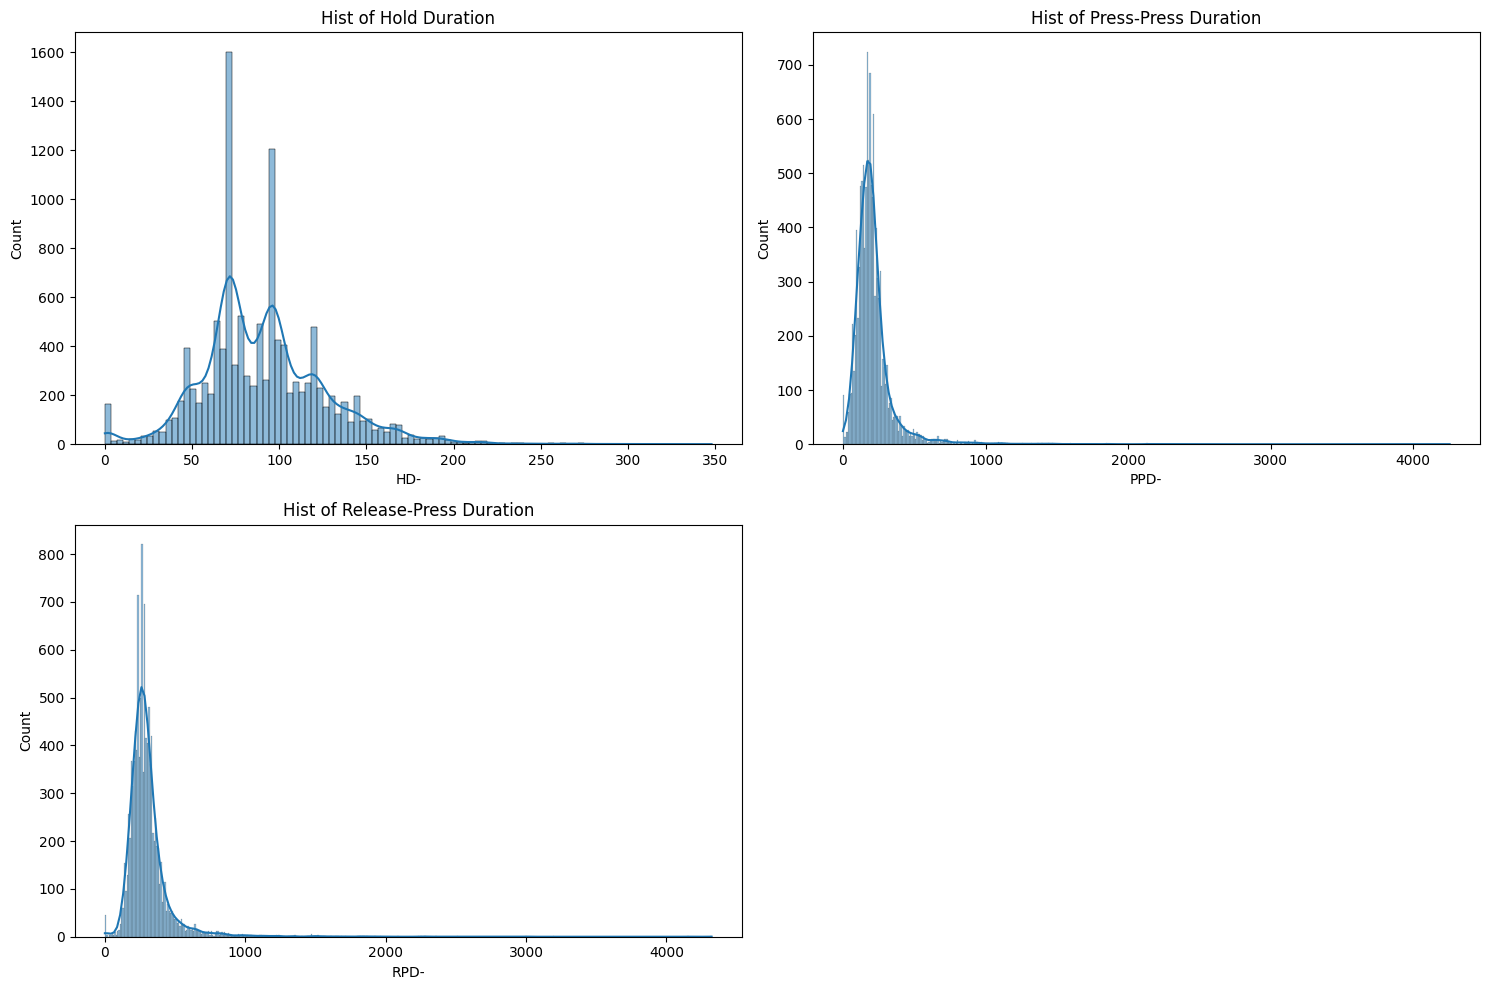

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(trainDFCombined['HD-'], kde=True).set_title('Hist of Hold Duration')

plt.subplot(2, 2, 2)
sns.histplot(trainDFCombined['PPD-'], kde=True).set_title('Hist of Press-Press Duration')

plt.subplot(2, 2, 3)
sns.histplot(trainDFCombined['RPD-'], kde=True).set_title('Hist of Release-Press Duration')

plt.tight_layout()
plt.show()

In [ ]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPDMax = trainDFCombined['RPD-'].max()
PPDMax = trainDFCombined['PPD-'].max()
print('Max values in train are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)


## Test Data
HDMax = testDFCombined['HD-'].max()
RPDMax = testDFCombined['RPD-'].max()
PPDMax = testDFCombined['PPD-'].max()
print('Max values in test data are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 348 RPDMax: 4322.0 PPDMax: 4255.0
Max values in test data are: HDMax: 194 RPDMax: 2331.0 PPDMax: 2221.0


In [ ]:
trainDFCombined.columns

Index(['user', 'press-', 'HD-', 'RPD-', 'PPD-', 'HDEnc', 'PPDEnc', 'RPDEnc'], dtype='object')

In [ ]:
testDFCombined.columns

Index(['press-', 'HD-', 'RPD-', 'PPD-', 'HDEnc', 'PPDEnc', 'RPDEnc'], dtype='object')

In [ ]:
## Lower limit values of bins created
HDBins, RPDBins, PPDBins, 'No. of buckets: '+str(len(HDBins)-1)

(array([  0.,  49.,  65.,  72.,  76.,  88.,  96., 102., 119., 137., 348.]),
 array([   0.,   96.,  125.,  146.,  168.,  187.,  204.,  225.,  257.,
         328., 4255.]),
 array([   0.,  184.,  215.,  238.,  258.,  276.,  297.,  321.,  358.,
         430., 4322.]),
 'No. of buckets: 10')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Pytho

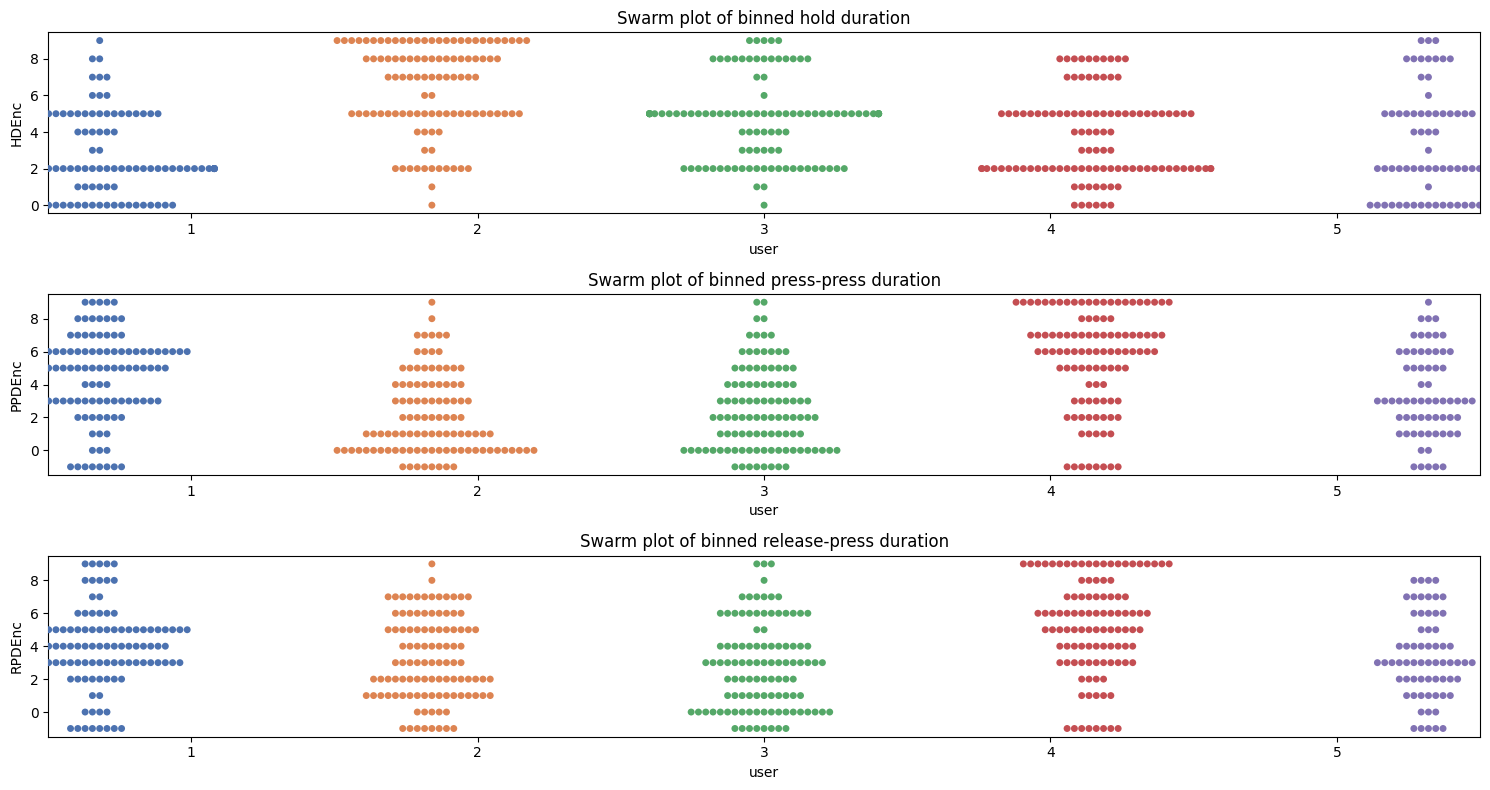

In [ ]:
plt.figure(figsize=(15, 8))
noOfUsers = 5

plt.subplot(3, 1, 1)
sns.swarmplot(y='HDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned hold duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.subplot(3, 1, 2)
sns.swarmplot(y='PPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned press-press duration')
plt.legend([],[], frameon=False)  # Hiaaaaade legend

plt.subplot(3, 1, 3)
sns.swarmplot(y='RPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned release-press duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()

In [ ]:
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
# trainDF_UserProps

In [ ]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
# testDF_UserProps

In [ ]:
testDF_UserProps.max().max()

9.0

In [ ]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

# trainDF_User_AllSampleProps

In [ ]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

# testDF_User_AllSampleProps

In [ ]:
# trainDF_UserProps

In [ ]:
# trainDF_User_AllSampleProps

KNN

In [ ]:
knn_summary = KNeighborsClassifier(1)
trainX_summary = trainDF_UserProps.reset_index().drop(columns=['user'])
trainY_summary = trainDF_UserProps.index

# testX_summary = testDF_UserProps.reset_index().drop(columns=['id'])

knn_summary.fit(trainX_summary,trainY_summary)

accuracy_score(knn_summary.predict(trainX_summary),trainY_summary)

1.0

Accuracies: [0.6494623655913978, 0.6150537634408602, 0.6193548387096774, 0.6268817204301075, 0.6344086021505376, 0.621505376344086, 0.6204301075268817]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

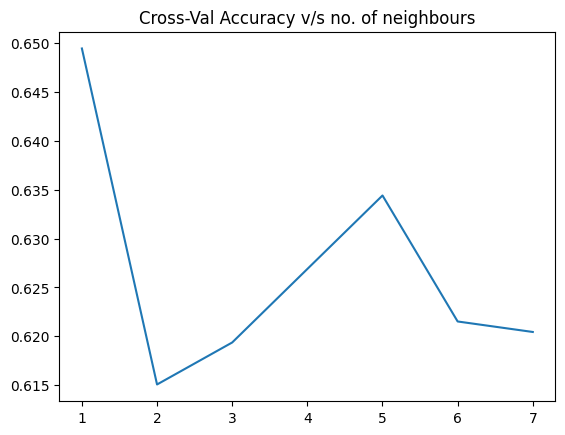

In [ ]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        acc += [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
    return sum(acc) / len(acc)
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

In [ ]:
knn_allSamples = KNeighborsClassifier(1)
knn_allSamples.fit(trainX_allSamples,trainY_allSamples)

testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = knn_allSamples.predict(testX_allSamples)
pd.DataFrame({'user':textPreds_allSamples},index=testX_allSamples.index).to_csv('submission.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Assuming trainDF_User_AllSampleProps is your training DataFrame
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

# Train the KNN model
knn_allSamples = KNeighborsClassifier(1)
knn_allSamples.fit(trainX_allSamples, trainY_allSamples)

# Save the trained model to a file
model_filename = r'D:\Kaggle\data\models\knn_allSamples_model.joblib'
joblib.dump(knn_allSamples, model_filename)


['D:\\Kaggle\\data\\models\\knn_allSamples_model.joblib']

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

# Load the trained model from the specified path
model_path = r'D:\Kaggle\data\models\knn_allSamples_model.joblib'
knn_allSamples = joblib.load(model_path)

# Load the test data (assuming testDF_User_AllSampleProps is your test DataFrame)
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
true_labels =  actual_labels

# Make predictions on the test data
predicted_labels = knn_allSamples.predict(testX_allSamples)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Create a DataFrame to show true and predicted labels
results_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

print("True and Predicted Labels:")
print(results_df)


Accuracy: 0.16666666666666666
True and Predicted Labels:
   True Labels  Predicted Labels
0          111                66
1          116               116
2          117               115
3          118                13
4          119               115
5          115               103


MY XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Create the XGBClassifier model with the provided parameters
xgb_model = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.8, 
    gamma=0, 
    gpu_id=-1,
    importance_type='gain', 
    interaction_constraints='',
    learning_rate=0.1, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=3, 
    missing=None,  # Change `nan` to `None`
    monotone_constraints='()', 
    n_estimators=270, 
    n_jobs=4, 
    nthread=4, 
    num_class=110,
    num_parallel_tree=1, 
    objective='multi:softprob', 
    random_state=27,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=None, 
    seed=27,
    subsample=0.8, 
    tree_method='exact', 
    validate_parameters=1,
    verbosity=None
)

# Print the model to verify
print(xgb_model)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=4, max_leaves=None, min_child_weight=3, missing=None,
              monotone_constraints='()', multi_strategy=None, n_estimators=270,
              n_jobs=4, nthread=4, ...)


In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming trainX_allSamples and trainY_allSamples are already loaded

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Create the XGBClassifier model
xgb_model = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.8, 
    gamma=0, 
    gpu_id=-1,
    importance_type='gain', 
    interaction_constraints='',
    learning_rate=0.1, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=3, 
    missing=np.nan,  # Change here
    monotone_constraints='()', 
    n_estimators=270, 
    n_jobs=4, 
    nthread=4, 
    num_class=110,
    num_parallel_tree=1, 
    objective='multi:softprob', 
    random_state=27,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=None, 
    seed=27,
    subsample=0.8, 
    tree_method='exact', 
    validate_parameters=1,
    verbosity=None
)

# Train the model
xgb_model.fit(trainX_allSamples, trainY_encoded)

# Load test data
testDF = pd.read_csv(r'D:\Kaggle\data\test_extracted.csv')

# Separate features and labels in the test dataset
testX_allSamples = testDF.drop(columns=['user'])
true_labels = testDF['user']

# Make sure the columns in the test data match the training data
missing_cols = set(trainX_allSamples.columns) - set(testX_allSamples.columns)
for col in missing_cols:
    testX_allSamples[col] = 0
testX_allSamples = testX_allSamples[trainX_allSamples.columns]

# Make predictions
predicted_labels = xgb_model.predict(testX_allSamples)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Display true and predicted labels
results_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

print("True and Predicted Labels:")
print(results_df)


Accuracy: 0.0
True and Predicted Labels:
   True Labels  Predicted Labels
0          111                83
1          116                83
2          117                83
3          118                83
4          119                83
5          115                83


XGBoost

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Use the number of unique classes after encoding
    nthread=4,
    seed=27
)

param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 210, 230, 250, 270, 290, 310, 330],
    'max_depth': range(4, 10, 1)
}

gsearch2b = GridSearchCV(
    estimator=xgb1,
    param_grid=param_search,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0),
    verbose=1
)

gsearch2b.fit(trainX_allSamples, trainY_encoded)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
CPU times: total: 15.2 s
Wall time: 17min 39s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=10,
                                     n_jobs=None, nthread=4, num_class=116, ...),
             n_jobs=4,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': range(4, 10),
                         'n_estimators': [100, 200, 210, 230, 250, 270, 290,
                                          310, 330]},
             scoring='accuracy', verbose=1)

In [ ]:
trainY_encoded

array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   3,   3,
         3,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   4,   4,
         4,   5,   5,   5,   5,   5,   5,   5,   5,   6,   6,   6,   6,
         6,   6,   6,   6,   7,   7,   7,   7,   7,   7,   7,   7,   8,
         8,   8,   8,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,
         9,   9,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,  11,
        11,  11,  11,  11,  11,  12,  12,  12,  12,  12,  12,  12,  12,
        13,  13,  13,  13,  13,  13,  13,  13,  14,  14,  14,  14,  14,
        14,  14,  14,  15,  15,  15,  15,  15,  15,  15,  15,  16,  16,
        16,  16,  16,  16,  16,  16,  17,  17,  17,  17,  17,  17,  17,
        17,  18,  18,  18,  18,  18,  18,  18,  18,  19,  19,  19,  19,
        19,  19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  22,  22,  22,  22,  2

In [ ]:
# trainY_encoded

In [ ]:
print("Shape of trainX_allSamples:", trainX_allSamples.shape)
print("Shape of trainY_encoded:", trainY_encoded.shape)


Shape of trainX_allSamples: (930, 39)
Shape of trainY_encoded: (930,)


In [ ]:
print('Best Estimator:\n',gsearch2b.best_estimator_)

Best Estimator:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=210, n_jobs=None, nthread=4,
              num_class=116, ...)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []

for train_index, test_index in sss.split(trainX_allSamples, trainY_encoded):
    gsearch2b.best_estimator_.fit(trainX_allSamples.iloc[train_index], trainY_encoded[train_index])
    predictions = gsearch2b.best_estimator_.predict(trainX_allSamples.iloc[test_index])
    acc = accuracy_score(predictions, trainY_encoded[test_index])
    print('Accuracy Score:', acc)
    accs.append(acc)

print('Average Accuracy:', sum(accs) / len(accs))


Accuracy Score: 0.7419354838709677
Accuracy Score: 0.7903225806451613
Accuracy Score: 0.7043010752688172
Accuracy Score: 0.7526881720430108
Accuracy Score: 0.7204301075268817
Average Accuracy: 0.7419354838709677


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples) + 1
 
# Create a DataFrame with 'idx' and 'user' columns and save it to a CSV file
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 'user': textPreds_allSamples})
submission_df.to_csv('submission.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training data (assuming trainX_allSamples and trainY_allSamples are already loaded)
# trainX_allSamples and trainY_allSamples should be your training feature set and labels

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Create the RandomForestClassifier model
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=None,      # Maximum depth of each tree
    min_samples_split=2, # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=27      # Seed for reproducibility
)

# Train the model
rf_model.fit(trainX_allSamples, trainY_encoded)

# Load test data
testDF = pd.read_csv(r'D:\Kaggle\data\test_extracted.csv')

# Separate features and labels in the test dataset
testX_allSamples = testDF.drop(columns=['user'])
true_labels = testDF['user']

# Ensure the columns in the test data match the training data
missing_cols = set(trainX_allSamples.columns) - set(testX_allSamples.columns)
for col in missing_cols:
    testX_allSamples[col] = 0
testX_allSamples = testX_allSamples[trainX_allSamples.columns]

# Make predictions
predicted_labels_encoded = rf_model.predict(testX_allSamples)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Display true and predicted labels
results_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

print("True and Predicted Labels:")
print(results_df)


Accuracy: 0.0
True and Predicted Labels:
   True Labels  Predicted Labels
0          111                84
1          116                84
2          117                84
3          118                84
4          119                84
5          115                84
